> Introdução à Ciência dos Dados \
> Ciência da Computação – UFV/Florestal


* **Nome:** Luciano Belo de Alcântara Júnior
* **Matrícula:**  3897

# Prova 1

In [109]:
#### Não altere essa célula!!! ####
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm,ttest_ind
import scipy as sp                                                         
import scipy.stats 
import statistics 

In [7]:
!wget https://raw.githubusercontent.com/lucianobajr/CCF-425/main/PROVA-1/usuarios_cartao_credito-prova.csv?token=GHSAT0AAAAAABT5KENKSUBRWYLH4R5RYGUKYVUOUYA

--2022-06-23 13:14:23--  https://raw.githubusercontent.com/lucianobajr/CCF-425/main/PROVA-1/usuarios_cartao_credito-prova.csv?token=GHSAT0AAAAAABT5KENKSUBRWYLH4R5RYGUKYVUOUYA
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 866640 (846K) [text/plain]
Saving to: ‘usuarios_cartao_credito-prova.csv?token=GHSAT0AAAAAABT5KENKSUBRWYLH4R5RYGUKYVUOUYA’

usuarios_cartao_cre 100%[===================>] 846.33K  --.-KB/s    in 0.03s   

2022-06-23 13:14:23 (32.7 MB/s) - ‘usuarios_cartao_credito-prova.csv?token=GHSAT0AAAAAABT5KENKSUBRWYLH4R5RYGUKYVUOUYA’ saved [866640/866640]



In [8]:
dataset = pd.read_csv('./usuarios_cartao_credito-prova.csv')
dataset

,Id_Cliente,Indicador_Status,Idade,Sexo,n_dependentes,nivel_educacao,estado_civil,renda,categoria_cartao,meses_contrato,n_produtos,limite_credito,total_transacoes
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,12691.0,42
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,8256.0,33
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,3418.0,20
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,3313.0,20
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,4716.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,4003.0,117
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,4277.0,69
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,5409.0,60
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,5281.0,62


# Questão 1


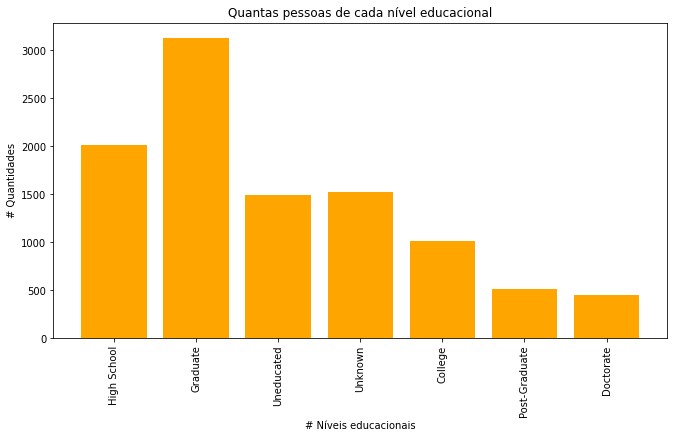

In [38]:
types = dataset['nivel_educacao'].unique()
counts = []

for type in types:
  counts.append(len(dataset[dataset['nivel_educacao'] == type]))

plt.figure(figsize =(11, 6))
plt.bar(types, counts, color = 'orange')
plt.ylabel("# Quantidades")
plt.xlabel("# Níveis educacionais")
plt.title("Quantas pessoas de cada nível educacional")
plt.xticks(types,rotation='vertical')
plt.subplots_adjust(bottom=0.15)
plt.show()

# Questão 2

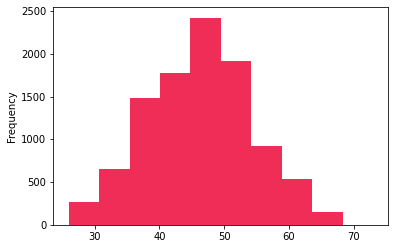

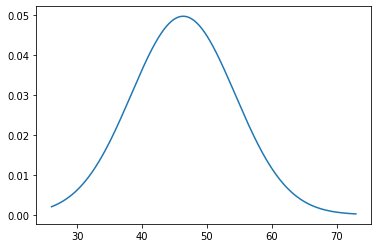

In [110]:
dataset['Idade'].plot(kind='hist', color='#EF2D56')
plt.show()


x_axis = np.arange(dataset['Idade'].min(), dataset['Idade'].max(), 0.01) 
mean = statistics.mean(dataset['Idade']) 
sd = statistics.stdev(dataset['Idade']) 
  
plt.plot(x_axis, norm.pdf(x_axis, mean, sd)) 
plt.show() 

A partir dos gráficos podemos perceber que as idades segue uma distribuição normal, já que à esquerda e a direita, há muito pouco desvio da distribuição da amostra

# Questão 3

In [60]:
# Quantos desvios da média dos homens

zscore = lambda x, mean, n: (x-mean)/n 

mens_limit = dataset[dataset['Sexo'] == 'M']['limite_credito']

print("Esta a %f desvios médios dos homens"%zscore(30000,mens_limit.mean(),len(mens_limit)))

Esta a 3.630599 desvios médios dos homens


# Questão 4

In [105]:
categories = dataset['categoria_cartao'].unique()

for category in categories:
  mean_categories = dataset[dataset['categoria_cartao'] == category]['limite_credito'].mean(axis=0)                                             

  std_categories = np.std(dataset[dataset['categoria_cartao'] == category]['limite_credito'])                                          
  confidence_interval = scipy.stats.norm.interval(0.95, loc=mean_categories, scale=std_categories) 
  print("Categoria = %s, Intervalo de confiança = (%f - %f)" %(category,confidence_interval[0],confidence_interval[1]))

Categoria = Blue, Intervalo de confiança = (-7617.879236 - 22345.439240)
Categoria = Gold, Intervalo de confiança = (11489.256246 - 45343.485133)
Categoria = Silver, Intervalo de confiança = (6375.716189 - 44179.955883)
Categoria = Platinum, Intervalo de confiança = (15577.240603 - 44989.659397)


# Questão 5

A média dos limite  de crédito dos homens é igual à media dos limite  de crédito das mulheres

* Hipótese nula: não é igual

In [85]:
''' 
- Se p > 0.05 aceita-se a hipótese nula
- Se p <= 0.05 rejeita-se a hipótese nula
'''

limit_woman = dataset[dataset['Sexo'] == 'F']['limite_credito']
limit_mens = dataset[dataset['Sexo'] == 'M']['limite_credito']

A = np.random.normal(limit_woman.mean(), limit_woman.std(), len(limit_woman))
B = np.random.normal(limit_mens.mean(), limit_mens.std(), len(limit_mens))

pvalue = ttest_ind(A,B).pvalue

print(f"P-valor: {pvalue}")
print("Aceita-se a hipótese nula") if (pvalue > (0.05)) else print("Rejeita-se a hipótese nula")

P-valor: 0.0
Rejeita-se a hipótese nula


Já que rejeita-se a hipótese nula, podemos afirmar que não possuem médias iguais

# Questão 6

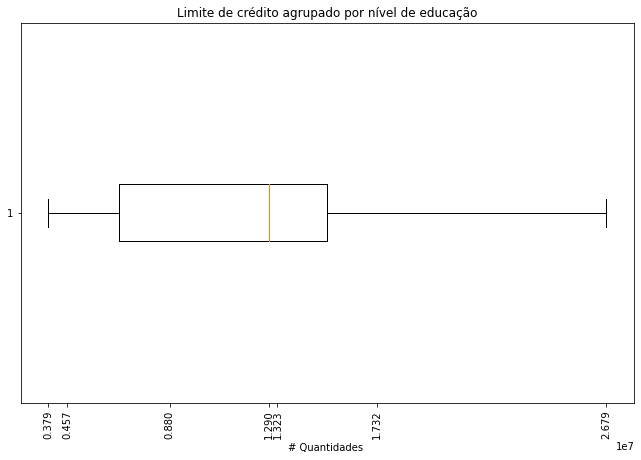

In [72]:
dataset_group_per_lim_and_education = dataset.groupby('nivel_educacao')['limite_credito'].sum().sort_values(ascending=False)

plt.figure(figsize =(11, 7))
plt.boxplot(dataset_group_per_lim_and_education ,vert = 0)
plt.xticks(dataset_group_per_lim_and_education ,rotation="vertical")
plt.xlabel("# Quantidades ")
plt.title("Limite de crédito agrupado por nível de educação")
plt.show()

# Questão 7

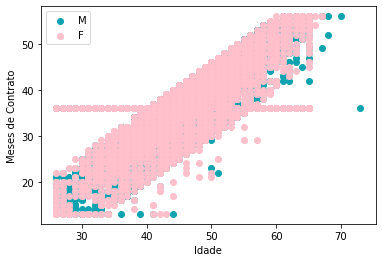

In [89]:
colors = {
    'M': '#0FA3B1',
    'F': '#FFC0CB'
}

fig, ax = plt.subplots()
data = list(map(lambda k: (k, dataset[dataset['Sexo'] == k]), colors.keys()))
[ax.scatter(x=d['Idade'], y=d['meses_contrato'], c=colors[k], label=k) for (k, d) in data]
plt.ylabel('Meses de Contrato')
plt.xlabel('Idade')
ax.legend() # Habilita a legenda das cores
plt.show()

In [113]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('prova-1.ipynb')